#### Assignment: Plotting Weather Patterns

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, following instructions are must needed:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

#### Import Libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Data Pre-processing

In [2]:
# read in csv file as dataframe
df_path = './data_temperature.csv'

df = pd.read_csv(df_path)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
# add datetime helpers to the dataframe to ultimately get to a DayOfYear field

df['DateTime'] = pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Mon'] = df['DateTime'].apply(lambda x: x.strftime('%b'))
df['DayOfYear'] = df['Mon'] + "-" + df['Day'].map(str)
df.head()

,ID,Date,Element,Data_Value,DateTime,Year,Month,Day,Mon,DayOfYear
0,USW00094889,2014-11-12,TMAX,22,2014-11-12,2014,11,12,Nov,Nov-12
1,USC00208972,2009-04-29,TMIN,56,2009-04-29,2009,4,29,Apr,Apr-29
2,USC00200032,2008-05-26,TMAX,278,2008-05-26,2008,5,26,May,May-26
3,USC00205563,2005-11-11,TMAX,139,2005-11-11,2005,11,11,Nov,Nov-11
4,USC00200230,2014-02-27,TMAX,-106,2014-02-27,2014,2,27,Feb,Feb-27


In [4]:
# prepare the dataframe to split by max and min and sorty by month and day to get chronological order

df_grp = df[['Month', 'Day', 'Year', 'DayOfYear', 'Element', 'Data_Value']]
df_grp = df_grp.sort_values(['Month', 'Day', 'Year'], axis=0, ascending=True)
df_grp = df_grp[df_grp['DayOfYear'] != 'Feb-29']
df_grp.head()

,Month,Day,Year,DayOfYear,Element,Data_Value
1860,1,1,2005,Jan-1,TMAX,150
1906,1,1,2005,Jan-1,TMIN,-17
2035,1,1,2005,Jan-1,TMIN,-17
2073,1,1,2005,Jan-1,TMAX,144
2812,1,1,2005,Jan-1,TMIN,-50


In [5]:
# slice the TMAX data from the dataframe and group by max value

df_high = df_grp[df_grp['Element']=='TMAX']
df_high = (pd.DataFrame(df_high.groupby(['Month', 'Day', 'DayOfYear'])['Data_Value']
        .max())
        .reset_index())
df_high['DailyHigh'] = df_high['Data_Value'] / 10
df_high = df_high[['DayOfYear', 'DailyHigh']]

print(df_high.head())
print(df_high.shape)

  DayOfYear  DailyHigh
0     Jan-1       15.6
1     Jan-2       13.9
2     Jan-3       13.3
3     Jan-4       10.6
4     Jan-5       12.8
(365, 2)


In [6]:
# slice the TMIN data from the dataframe and group by max value

df_low = df_grp[df_grp['Element']=='TMIN']
df_low = (pd.DataFrame(df_low.groupby(['Month', 'Day', 'DayOfYear'])['Data_Value']
        .min())
        .reset_index())
df_low['DailyLow'] = df_low['Data_Value'] / 10
df_low = df_low[['DayOfYear', 'DailyLow']]

print(df_low.head())
print(df_low.shape)

  DayOfYear  DailyLow
0     Jan-1     -16.0
1     Jan-2     -26.7
2     Jan-3     -26.7
3     Jan-4     -26.1
4     Jan-5     -15.5
(365, 2)


In [7]:
# get max data for 2015 only 

df_2015 = df_grp[df_grp['Year']==2015]

df_2015_high = df_2015[df_2015['Element']=='TMAX']
df_2015_high = (pd.DataFrame(
                df_2015_high.groupby(['Month', 'Day', 'DayOfYear'])
                ['Data_Value'].max())
               .reset_index())
df_2015_high['2015 High'] = df_2015_high['Data_Value'] / 10
df_2015_high = df_2015_high[['DayOfYear', '2015 High']]

df_2015_high.head()

,DayOfYear,2015 High
0,Jan-1,1.1
1,Jan-2,3.9
2,Jan-3,3.9
3,Jan-4,4.4
4,Jan-5,2.8


In [8]:
# get min data for 2015 only 

df_2015_low = df_2015[df_2015['Element']=='TMIN']
df_2015_low = (pd.DataFrame(
                df_2015_low.groupby(['Month', 'Day', 'DayOfYear'])
                ['Data_Value'].min())
               .reset_index())
df_2015_low['2015 Low'] = df_2015_low['Data_Value'] / 10
df_2015_low = df_2015_low[['DayOfYear', '2015 Low']]

df_2015_low.head()

,DayOfYear,2015 Low
0,Jan-1,-13.3
1,Jan-2,-12.2
2,Jan-3,-6.7
3,Jan-4,-8.8
4,Jan-5,-15.5


In [9]:
# get max data for 2005-2015 period

df_pre2015 = df_grp[df_grp['Year'] < 2015]

df_pre2015_high = df_pre2015[df_pre2015['Element']=='TMAX']
df_pre2015_high = (pd.DataFrame(
                df_pre2015_high.groupby(['Month', 'Day', 'DayOfYear'])
                ['Data_Value'].max())
               .reset_index())
df_pre2015_high['Record High'] = df_pre2015_high['Data_Value'] / 10
df_pre2015_high = df_pre2015_high[['DayOfYear', 'Record High']]

df_pre2015_high.head()

,DayOfYear,Record High
0,Jan-1,15.6
1,Jan-2,13.9
2,Jan-3,13.3
3,Jan-4,10.6
4,Jan-5,12.8


In [10]:
# get min data for 2005-2015 period

df_pre2015_low = df_pre2015[df_pre2015['Element']=='TMIN']
df_pre2015_low = (pd.DataFrame(
                df_pre2015_low.groupby(['Month', 'Day', 'DayOfYear'])
                ['Data_Value'].min())
               .reset_index())
df_pre2015_low['Record Low'] = df_pre2015_low['Data_Value'] / 10
df_pre2015_low = df_pre2015_low[['DayOfYear', 'Record Low']]

df_pre2015_low.head()

,DayOfYear,Record Low
0,Jan-1,-16.0
1,Jan-2,-26.7
2,Jan-3,-26.7
3,Jan-4,-26.1
4,Jan-5,-15.0


In [11]:
# merge datframes on DayOfYear and flag record breaking temps

df_compare = df_2015_high.merge(df_2015_low, left_on='DayOfYear', right_on='DayOfYear')
df_compare = df_compare.merge(df_pre2015_high, left_on='DayOfYear', right_on='DayOfYear')
df_compare = df_compare.merge(df_pre2015_low, left_on='DayOfYear', right_on='DayOfYear')
df_compare = df_compare.merge(df_high, left_on='DayOfYear', right_on='DayOfYear')
df_compare = df_compare.merge(df_low, left_on='DayOfYear', right_on='DayOfYear')

# flag days the broke the Record High and Record Low Temps in 2015

df_compare['BrokeHigh'] = np.where(df_compare['2015 High'] > df_compare['Record High'], df_compare['2015 High'], np.nan)
df_compare['BrokeLow'] = np.where(df_compare['2015 Low'] < df_compare['Record Low'], df_compare['2015 Low'], np.nan)

df_compare.head()

,DayOfYear,2015 High,2015 Low,Record High,Record Low,DailyHigh,DailyLow,BrokeHigh,BrokeLow
0,Jan-1,1.1,-13.3,15.6,-16.0,15.6,-16.0,NaN,NaN
1,Jan-2,3.9,-12.2,13.9,-26.7,13.9,-26.7,NaN,NaN
2,Jan-3,3.9,-6.7,13.3,-26.7,13.3,-26.7,NaN,NaN
3,Jan-4,4.4,-8.8,10.6,-26.1,10.6,-26.1,NaN,NaN
4,Jan-5,2.8,-15.5,12.8,-15.0,12.8,-15.5,NaN,-15.5


In [12]:
# define plot series

days = df_compare['DayOfYear']
highs = df_compare['Record High']
lows = df_compare['Record Low']
record_highs = df_compare['BrokeHigh']
record_lows = df_compare['BrokeLow']
pos = np.arange(0, 364, 29)
days = days[pos]

days.head()

0       Jan-1
29     Jan-30
58     Feb-28
87     Mar-29
116    Apr-27
Name: DayOfYear, dtype: object

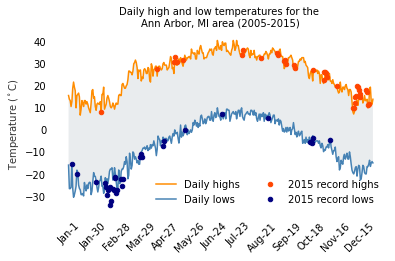

In [13]:
#define plot and plot the four series by day of year

fig, ax1 = plt.subplots()

ax1.set_ylabel('Temperature ($^\circ$C)', alpha=0.8)
ax1.plot(highs, '-', 
         label='Daily highs', 
         color='darkorange')
ax1.plot(lows, '-', 
         label='Daily lows', 
         color='steelblue')
ax1.plot(record_highs, 'o', 
         label='2015 record highs', 
         color='orangered', 
         markersize=4.5)
ax1.plot(record_lows, 'o', 
         label='2015 record lows', 
         color='navy', 
         markersize=4.5)
ax1.set_xticks(pos)
ax1.set_xticklabels(days)

plt.title('Daily high and low temperatures for the \nAnn Arbor, MI area (2005-2015)',
         fontsize=10)

# rotate the tick labels for the x axis
x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.25)

# add and format legend
ax1.legend()
ax1.legend(loc='lower right', frameon=False, ncol=2)

# fill the area between the highs and lows
plt.gca().fill_between(range(len(highs)), 
                       highs, lows, 
                       facecolor='slategrey', 
                       alpha=0.15)

# remove border and tick marks
plt.tick_params(top=False, bottom=False, left=False, right=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()